<a href="https://colab.research.google.com/github/johanv26/Analitica/blob/main/videogames_linear_UserScore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Video Games 

In [ ]:
#descargar datos video_games
!pip install wget
import wget
import pandas as pd
import numpy as np
#datos video juelgos-2016
#csv file id#
FILE_ID='1kMvhv1VpUpGmyyDZneZ7DaIpXZx9826Z'
url='https://drive.google.com/uc?export=download&id='+FILE_ID
#datos Colombia
import os.path as path
csv_file='Video_Games_Sales_as_at_22_Dec_2016.csv'
if not path.exists(csv_file):
  wget.download(url,csv_file)

gamesdf = pd.read_csv(csv_file)
gamesdf.head(20)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
gamesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [ ]:
def userscore_fix(gamesdf):
  Xi=gamesdf
  frec_val=gamesdf['User_Score'].value_counts()
  mean=np.mean(frec_val.index[1:].astype('float64')) 
  Xi['User_Score'].replace(regex=["tbd"], value=mean,inplace=True)      
  Xi['User_Score'] = Xi['User_Score'].astype('float64');
  return gamesdf

In [ ]:
gamesdf=userscore_fix(gamesdf)

In [ ]:
gamesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [ ]:
gamesdf['User_Score'].value_counts()

4.989474    2425
7.800000     324
8.000000     290
8.200000     282
8.300000     254
            ... 
0.900000       2
2.300000       2
1.000000       2
9.700000       1
0.000000       1
Name: User_Score, Length: 96, dtype: int64

In [ ]:
#Paso 2: Particion entrenamiento y validacion
#Tamanio Xtrain 70%. Tamanio Xtest=30%
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
df_train, df_test =train_test_split(gamesdf,test_size=0.3)
col_sal= 'User_Score'
ytrain=df_train[col_sal]
ytest=df_test[col_sal]
df_train.drop(columns=col_sal,inplace=True)
df_test.drop(columns=col_sal,inplace=True)
ytrain

12890    4.989474
7335          NaN
1626          NaN
10924    4.989474
369      7.500000
           ...   
1757     8.200000
14801    3.500000
14853    4.989474
12844         NaN
2039     8.200000
Name: User_Score, Length: 11703, dtype: float64

In [ ]:
#Completao de datos por moda de la salida Global sales
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='most_frequent')
ytrain=imputer.fit_transform(pd.DataFrame(ytrain))
ytrain=ytrain.reshape(-1)

ytest=imputer.transform(pd.DataFrame(ytest))
ytest=ytest.reshape(-1)

print(ytrain.shape,ytest.shape)

(11703,) (5016,)


In [ ]:
import numpy as np

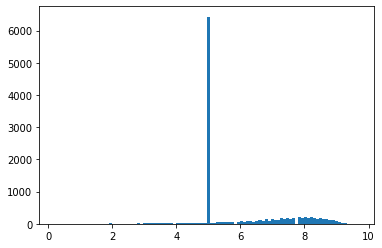

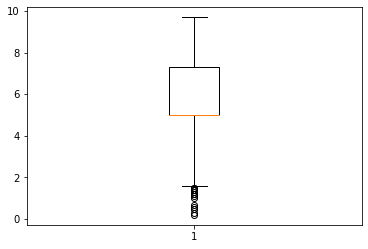

In [ ]:
import matplotlib.pyplot as plt
plt.hist(ytrain,bins=100)
plt.show()

#diagrama de caja

#caja->
plt.boxplot(ytrain)
plt.show()

In [ ]:
print('Numero de valores nulos por columnas : \n')
for column in gamesdf:
  print(column,' ',gamesdf[column].isnull().sum())


Numero de valores nulos por columnas : 

Name   2
Platform   0
Year_of_Release   269
Genre   2
Publisher   54
NA_Sales   0
EU_Sales   0
JP_Sales   0
Other_Sales   0
Global_Sales   0
Critic_Score   8582
Critic_Count   8582
User_Score   6704
User_Count   9129
Developer   6623
Rating   6769


In [ ]:
#definir columnas 
col_scores = ['User_Score','Critic_Score','Critic_Count','User_Count']
# Strange values tbd

cat = ['Name','Platform','Genre','Publisher','Developer','Rating']
items = [] 
for i in cat:
    items += [list(gamesdf[i].value_counts().index)]
cat_names = dict(zip(cat, items))

In [ ]:
gamesdf['Platform'].value_counts().index

Index(['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'XB', 'GBA', 'GC',
       '3DS', 'PSV', 'PS4', 'N64', 'XOne', 'SNES', 'SAT', 'WiiU', '2600', 'GB',
       'NES', 'DC', 'GEN', 'NG', 'SCD', 'WS', '3DO', 'TG16', 'PCFX', 'GG'],
      dtype='object')

In [ ]:
gamesdf[cat[1]].value_counts()

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [ ]:
frec_val=[]
for column in gamesdf:
  frec_val.append(gamesdf[column].value_counts())
print(frec_val[-2
          ])




Ubisoft                            204
EA Sports                          172
EA Canada                          167
Konami                             162
Capcom                             139
                                  ... 
SpiderMonk                           1
SuperBot Entertainment               1
Treyarch, Infinity Ward              1
Battlefront.com, 1C, 1C Company      1
Master Creating                      1
Name: Developer, Length: 1696, dtype: int64


In [ ]:
#%% dummy transformer
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
class dummy_games(BaseEstimator,TransformerMixin):
    #inicializacion de clase y varaibles
    def __init__(self,col_scores, cat_usr):#constructor clase
        
        self.col_stats = col_scores#lista atributos tipo score
        self.cat_usr = cat_usr #lista de atributos categoricos

    def fit(self,X, *_):
        Xi = X.copy() #copiar dataset para no reemplazar original
        self.imputer_num = SimpleImputer(strategy="most_frequent")#crear imputador tipo modo
        self.a = Xi.columns[np.sum(Xi.isna())> 0] #encontrar columnas con datos faltantes
        #print(a)
        self.imputer_num.fit(Xi[self.a])# ajustar imputador
        
        Xi[self.a] = self.imputer_num.transform(Xi[self.a]) #evaluar  sobre datos imputador
        
        #codificar
        #only User_Score is cnahge the tbd most frequetn for mean.

        

        
        
        
        cat = []#codificar variables categoricas con ordinal encoder
        for i in self.cat_usr.keys():
            cat = cat + [[*self.cat_usr.get(i)]]
        self.col_cat_usr = OrdinalEncoder(categories=cat)
        Xi[[*self.cat_usr.keys()]] =self.col_cat_usr.fit_transform(Xi[[*self.cat_usr.keys()]])
        

        
        return self    

    def transform(self, X, *_):
        Xi = X.copy()
        Xi[self.a] = self.imputer_num.transform(Xi[self.a])

              
      #Funcion para userscore ya implemetnada
          
        Xi[[*self.cat_usr.keys()]] =self.col_cat_usr.transform(Xi[[*self.cat_usr.keys()]])
        
        #Fase de transformacion
        #
        
        return Xi
    
    def fit_transform(self,X,*_):
        self.fit(X)
        return self.transform(X)
#%%

Fit fill the empty values with most frequently and cofigre the calss.Transform hange the values with function to full float df.

so in fit you manage the calss with the info of the datafram in transform, you use to return a dataframe with the values changed after the process step in making the class with the form using fit.

In rating developres is nan that mean no public developers, that can mean a data no se can use it.

User score has the onlye change from the mean value becasuse tbd ts like a anan and is the mode solo we canhge it to mean.

In [ ]:
dummy=dummy_games(col_scores=col_scores,cat_usr=cat_names)
dftrain_pre=dummy.fit_transform(df_train)
dftrain_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11703 entries, 12890 to 2039
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             11703 non-null  float64
 1   Platform         11703 non-null  float64
 2   Year_of_Release  11703 non-null  float64
 3   Genre            11703 non-null  float64
 4   Publisher        11703 non-null  float64
 5   NA_Sales         11703 non-null  float64
 6   EU_Sales         11703 non-null  float64
 7   JP_Sales         11703 non-null  float64
 8   Other_Sales      11703 non-null  float64
 9   Global_Sales     11703 non-null  float64
 10  Critic_Score     11703 non-null  float64
 11  Critic_Count     11703 non-null  float64
 12  User_Count       11703 non-null  float64
 13  Developer        11703 non-null  float64
 14  Rating           11703 non-null  float64
dtypes: float64(15)
memory usage: 1.4 MB


In [ ]:
dftrain_pre #Falta modofical el valor para no repetir por el mas repetido

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count,Developer,Rating
12890,1911.0,1.0,2006.0,0.0,4.0,0.05,0.00,0.00,0.00,0.05,58.0,7.0,5.0,427.0,0.0
7335,9305.0,2.0,2010.0,0.0,2.0,0.00,0.00,0.21,0.00,0.21,71.0,4.0,5.0,0.0,0.0
1626,1507.0,6.0,1998.0,6.0,1.0,0.68,0.47,0.00,0.08,1.23,71.0,4.0,5.0,0.0,0.0
10924,2659.0,0.0,2009.0,2.0,9.0,0.05,0.04,0.00,0.01,0.09,71.0,4.0,5.0,136.0,0.0
369,37.0,4.0,2010.0,1.0,0.0,0.71,2.39,0.02,0.40,3.52,88.0,66.0,155.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,10560.0,1.0,2007.0,7.0,8.0,0.53,0.48,0.01,0.12,1.15,78.0,32.0,66.0,66.0,0.0
14801,2022.0,2.0,2014.0,6.0,54.0,0.02,0.01,0.00,0.00,0.03,58.0,4.0,4.0,299.0,0.0
14853,551.0,2.0,2016.0,1.0,193.0,0.00,0.02,0.00,0.00,0.03,71.0,4.0,5.0,550.0,0.0
12844,7436.0,11.0,2011.0,1.0,2.0,0.00,0.00,0.06,0.00,0.06,71.0,4.0,5.0,0.0,0.0


In [ ]:
dftrain_pre['Developer'].value_counts()

0.0       4762
1.0        132
2.0        124
3.0        117
4.0         99
          ... 
988.0        1
1651.0       1
1578.0       1
652.0        1
1370.0       1
Name: Developer, Length: 1470, dtype: int64

In [ ]:
corr_matrix=dftrain_pre.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count,Developer,Rating
Name,1.000000,0.028429,-0.212975,0.155591,0.157553,-0.068443,-0.076014,0.104979,-0.093886,-0.051475,-0.001488,-0.131929,-0.071678,0.042600,-0.219981
Platform,0.028429,1.000000,-0.258137,0.003655,0.061061,0.036349,-0.015052,0.145594,-0.077896,0.036313,0.076144,-0.071897,0.039804,-0.096268,-0.091018
Year_of_Release,-0.212975,-0.258137,1.000000,-0.124253,-0.065809,-0.099725,0.009863,-0.171365,0.043257,-0.082580,-0.007807,0.159418,0.119492,0.110756,0.223162
Genre,0.155591,0.003655,-0.124253,1.000000,0.068199,-0.012242,-0.024711,0.039469,-0.046516,-0.012220,0.021689,-0.040659,-0.026116,0.071935,-0.090113
Publisher,0.157553,0.061061,-0.065809,0.068199,1.000000,-0.090219,-0.093377,-0.047972,-0.085102,-0.100512,-0.037961,-0.141144,-0.022507,0.077052,-0.087110
NA_Sales,-0.068443,0.036349,-0.099725,-0.012242,-0.090219,1.000000,0.656563,0.431945,0.558502,0.922554,0.175310,0.236062,0.193333,-0.025691,0.047082
EU_Sales,-0.076014,-0.015052,0.009863,-0.024711,-0.093377,0.656563,1.000000,0.394884,0.673028,0.851397,0.201097,0.285225,0.299725,-0.015611,0.065119
JP_Sales,0.104979,0.145594,-0.171365,0.039469,-0.047972,0.431945,0.394884,1.000000,0.265039,0.611116,0.101373,0.035742,0.036237,-0.078189,-0.082469
Other_Sales,-0.093886,-0.077896,0.043257,-0.046516,-0.085102,0.558502,0.673028,0.265039,1.000000,0.706896,0.180307,0.264524,0.263201,-0.006903,0.084690
Global_Sales,-0.051475,0.036313,-0.082580,-0.012220,-0.100512,0.922554,0.851397,0.611116,0.706896,1.000000,0.205376,0.262410,0.243587,-0.036630,0.039881


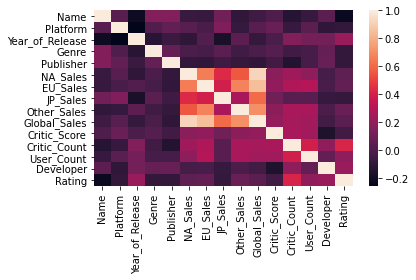

In [ ]:
import seaborn as sns
sns.heatmap(corr_matrix,xticklabels=corr_matrix.columns.values,yticklabels=corr_matrix.columns.values)
plt.tight_layout()
#plt.savefig('results/corr_matrix.pdf', format='pdf', dpi=300)
plt.show()

In [ ]:
print(f'la longitud de la salida ventas globales separados es entrenamiento={len(ytrain)} y test={len(ytest)}')

la longitud de la salida ventas globales separados es entrenamiento=11703 y test=5016


In [ ]:
dftrain_pre2 = dftrain_pre.copy()
dftrain_pre2['Salida'] = ytrain
corr_matrix = abs(dftrain_pre2.corr())
corr_matrix['Salida'].sort_values(ascending=False)

Salida             1.000000
Critic_Count       0.575486
Critic_Score       0.361242
Rating             0.346732
Developer          0.168717
User_Count         0.167898
Other_Sales        0.154736
EU_Sales           0.147563
Global_Sales       0.144941
NA_Sales           0.138387
Name               0.137603
Publisher          0.118888
Platform           0.086351
Year_of_Release    0.045160
Genre              0.024472
JP_Sales           0.009035
Name: Salida, dtype: float64

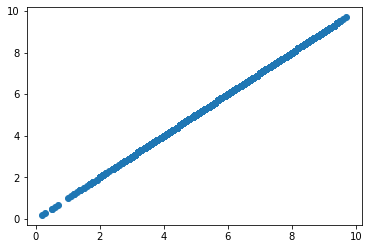

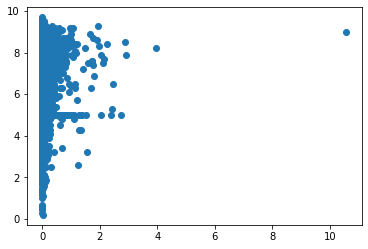

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(dftrain_pre2['Salida'],ytrain)#Cormporbar q salida si fue reemplazo por ytrain
plt.figure('1')
plt.scatter(dftrain_pre['Other_Sales'],ytrain)



In [ ]:
ytrain.shape

(11703,)

In [ ]:
col_scores
cat_names

{'Developer': ['Ubisoft',
  'EA Sports',
  'EA Canada',
  'Konami',
  'Capcom',
  'EA Tiburon',
  'Electronic Arts',
  'Ubisoft Montreal',
  'Visual Concepts',
  'Omega Force',
  "Traveller's Tales",
  'Vicarious Visions',
  'Activision',
  'TT Games',
  'Nintendo',
  'THQ',
  'Namco',
  'Codemasters',
  'Artificial Mind and Movement',
  'Midway',
  "Yuke's",
  'Harmonix Music Systems',
  'High Voltage Software',
  'Maxis',
  'Square Enix',
  'Eurocom Entertainment Software',
  'Arc System Works',
  'FUN Labs',
  'Neversoft Entertainment',
  'Treyarch',
  'From Software',
  'TOSE',
  'WayForward',
  'Sonic Team',
  'Sega',
  'Griptonite Games',
  'Rebellion',
  'Radical Entertainment',
  'Blitz Games',
  'Milestone S.r.l',
  'Rainbow Studios',
  'Climax Group',
  'Krome Studios',
  'Exient Entertainment',
  'Acclaim',
  'Gearbox Software',
  'Koei',
  'SCEA San Diego Studios',
  'KCET',
  'Point of View',
  'Toys for Bob',
  'Digital Eclipse',
  'Avalanche Software',
  'Torus Games',
 

# Modelo de regresión

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,SGDRegressor

steps = [('preproceso',dummy_games(col_scores=col_scores,cat_usr=cat_names)), 
         ('regresion',LinearRegression())
         ]
metodo_full = Pipeline(steps=steps)
metodo_full

metodo_full.fit(df_train,ytrain) #entrena todos los pasos

Pipeline(memory=None,
         steps=[('preproceso',
                 dummy_games(cat_usr={'Developer': ['Ubisoft', 'EA Sports',
                                                    'EA Canada', 'Konami',
                                                    'Capcom', 'EA Tiburon',
                                                    'Electronic Arts',
                                                    'Ubisoft Montreal',
                                                    'Visual Concepts',
                                                    'Omega Force',
                                                    "Traveller's Tales",
                                                    'Vicarious Visions',
                                                    'Activision', 'TT Games',
                                                    'Nintendo', 'THQ', 'Namco',
                                                    'Codemasters',
                                                    'Artificial Mind

In [ ]:
ytest_e = metodo_full.predict(df_test)
metodo_full[1].coef_


array([-2.74174703e-05, -1.91477815e-02, -2.40921462e-02, -3.33722355e-03,
       -6.37800859e-04, -5.70590914e-01, -6.56781853e-01, -5.65986002e-01,
       -4.94396391e-01,  5.60369444e-01,  4.50001873e-02,  3.83014310e-02,
       -4.10578394e-04,  4.79564218e-04,  2.46802776e-01])

In [ ]:
len(ytest)
len(ytest_e)
np.linalg.norm(ytest-ytest_e)

78.07562072312724

In [ ]:
ytest

array([4.98947368, 7.2       , 4.98947368, ..., 4.98947368, 4.98947368,
       8.2       ])

In [ ]:
ytest_e

array([5.43908419, 6.45765582, 5.40505281, ..., 5.37554543, 5.66310132,
       6.36164577])

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5016 entries, 5562 to 804
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             5015 non-null   object 
 1   Platform         5016 non-null   object 
 2   Year_of_Release  4923 non-null   float64
 3   Genre            5015 non-null   object 
 4   Publisher        4999 non-null   object 
 5   NA_Sales         5016 non-null   float64
 6   EU_Sales         5016 non-null   float64
 7   JP_Sales         5016 non-null   float64
 8   Other_Sales      5016 non-null   float64
 9   Global_Sales     5016 non-null   float64
 10  Critic_Score     2446 non-null   float64
 11  Critic_Count     2446 non-null   float64
 12  User_Count       2268 non-null   float64
 13  Developer        3013 non-null   object 
 14  Rating           2971 non-null   object 
dtypes: float64(9), object(6)
memory usage: 627.0+ KB


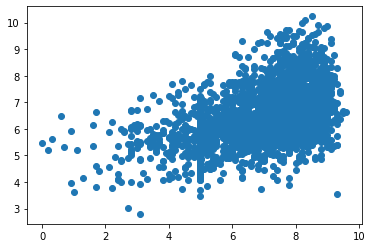

In [ ]:
plt.scatter(ytest,ytest_e)

In [ ]:
metodo_full.steps[1][1]

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
metodo_full

Pipeline(memory=None,
         steps=[('preproceso',
                 dummy_games(cat_usr={'Developer': ['Ubisoft', 'EA Sports',
                                                    'EA Canada', 'Konami',
                                                    'Capcom', 'EA Tiburon',
                                                    'Electronic Arts',
                                                    'Ubisoft Montreal',
                                                    'Visual Concepts',
                                                    'Omega Force',
                                                    "Traveller's Tales",
                                                    'Vicarious Visions',
                                                    'Activision', 'TT Games',
                                                    'Nintendo', 'THQ', 'Namco',
                                                    'Codemasters',
                                                    'Artificial Mind